<a href="https://colab.research.google.com/github/Sahasra337/Crop-Recommendation-System---Statistical-Machine-Learning/blob/main/crop_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CROP RECOMMENDATION


Precision agriculture is in trend nowadays. It helps the farmers to get informed decision about the farming strategy.

Data fields

*   N - ratio of Nitrogen content in soil
*   P - ratio of Phosphorous content in soil
*   K - ratio of Potassium content in soil
*   temperature - temperature in degree Celsius
*   humidity - relative humidity in %
*   ph - ph value of the soil
*   rainfall - rainfall in mm
*   label - which crop is recommended










---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import seaborn as sns
import math
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [ ]:
crop = pd.read_csv("/content/Crop_recommendation.csv")

T-TEST

In [ ]:
from scipy import stats

xbar = 50.55 ; mu0 = 140; s = 36.9; n = 30

#xbar =avg N ; muo= 140 ; s=36.9 ; n= 30


In [ ]:
 t_smple = (xbar-mu0)/(s/np.sqrt(float(n)));
 print ("Test Statistic:",round(t_smple,2))

Test Statistic: -13.28


In [ ]:
 alpha = 0.05
 t_alpha = stats.t.ppf(alpha,n-1);

In [ ]:
print ("Critical value from t-table:",round(t_alpha,3))

Critical value from t-table: -1.699


In [ ]:
p_val = stats.t.sf(np.abs(t_smple), n-1);

In [ ]:
print ("Lower tail p-value from t-table", p_val)

Lower tail p-value from t-table 3.7340473631319196e-14


In [ ]:
crop1=crop['rainfall'];crop1

0       202.935536
1       226.655537
2       263.964248
3       242.864034
4       262.717340
           ...    
2195    177.774507
2196    127.924610
2197    173.322839
2198    127.175293
2199    140.937041
Name: rainfall, Length: 2200, dtype: float64

In [ ]:
stats.ttest_1samp(crop1,155)

TtestResult(statistic=-43.9836191216103, pvalue=1.0560894900810785e-303, df=2199)

In [ ]:
#no significance difference . null hypothesis is accepted
#variation in rainfall levels does not have a significant effect on crop yield or crop suitability.

# New Section

Feature Engineering


In [ ]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
def mean(df):
    return sum(crop.N)/len(crop)
print(mean(crop))

50.551818181818184


In [ ]:
def median(crop):
    median = sorted(crop) [len(crop)// 2]
    return median

In [ ]:
sort_data = sorted(crop)
index1 = len(sort_data)*.25
print(index1)
#50th percentile
sort_data = sorted(crop)
index2 = len(sort_data)*.50
print(index2)
#75th percentile
sort_data = sorted(crop)
index3 = len(sort_data)*.75
print(index3)

2.0
4.0
6.0


In [ ]:
print(np.std(crop))


N              36.908943
P              32.978385
K              50.636418
temperature     5.062598
humidity       22.258751
ph              0.773762
rainfall       54.945897
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
modes = crop.mode().iloc[0:3]

# Display the modes for each field
print("Modes for each field:")
print(modes)

Modes for each field:
      N     P     K  temperature   humidity        ph   rainfall      label
0  22.0  60.0  17.0     8.825675  14.258040  3.504752  20.211267      apple
1  40.0   NaN   NaN     9.467960  14.273280  3.510404  20.360011     banana
2   NaN   NaN   NaN     9.535586  14.280419  3.525366  20.390205  blackgram


In [ ]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
y=['label']
x=[['N','P','K','temperature','humidity','ph','rainfall']]

In [ ]:
crop.shape

(2200, 8)

NULL VALUES

In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
crop.duplicated().sum()

0

Printing the unique values of 'label' column

In [ ]:
df = pd.DataFrame(crop)
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
crop.nunique

<bound method DataFrame.nunique of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [ ]:
corr=crop.corr()

<ipython-input-28-657f19cccde7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=crop.corr()


In [ ]:
corr


,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<ipython-input-30-7d7308f7387c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop.corr(), annot=True,cmap='Wistia')


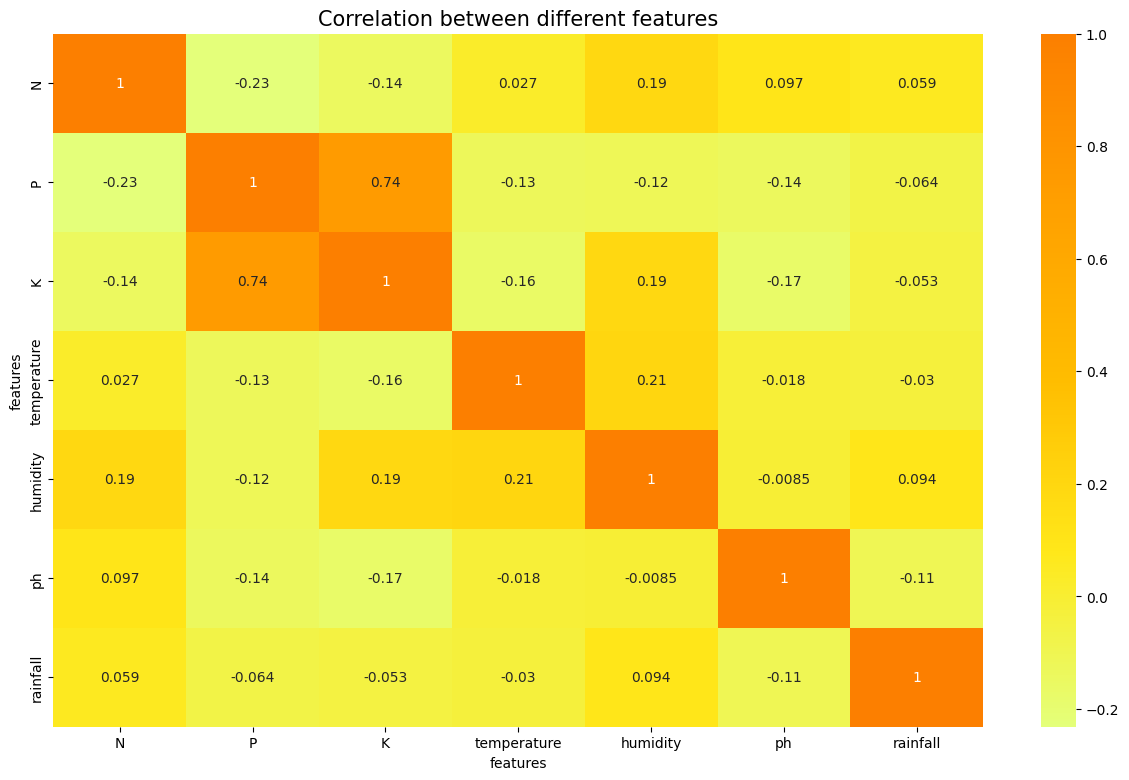

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(crop.corr(), annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

ENCODING

In [ ]:
crop_dictionary = {
    'rice':1,
    'maize':2,
    'chickpea':3,
    'kidneybeans':4,
    'pigeonpeas':5,
    'mothbeans':6,
    'mungbean':7,
    'blackgram':8,
    'lentil':9,
    'pomegranate':10,
    'banana':11,
    'mango':12,
    'grapes':13,
    'watermelon':14,
    'muskmelon':15,
    'apple':16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee':22
}
crop['crop_num']=crop['label'].map(crop_dictionary)

In [ ]:
crop['crop_num'].value_counts()

1     100
2     100
21    100
20    100
19    100
18    100
17    100
16    100
15    100
14    100
13    100
12    100
11    100
10    100
9     100
8     100
7     100
6     100
5     100
4     100
3     100
22    100
Name: crop_num, dtype: int64

In [ ]:

crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [ ]:
y=crop['crop_num']
X=crop[['N','P','K','temperature','humidity','ph','rainfall']]

feature selection using F_score

In [ ]:
#calculates the ratio of between-group variation to within-group variation.
#helping to identify the most informative features for classification or regression tasks.
from sklearn.feature_selection import f_classif,SelectKBest
fs=SelectKBest(score_func=f_classif,k=5)

In [ ]:
fs.fit(X,y)

SelectKBest(k=5)

In [ ]:
fs.get_support()# retrieve the selected features from a feature selection process like SelectKBest

array([ True,  True,  True, False,  True, False,  True])

In [ ]:
fs.get_support().sum()

5

In [ ]:
def list_ceil(X):
  return[math.ceil(i) for i in X]

In [ ]:

print("F values:")
print(fs.scores_)

F values:
[  897.56818633  1885.65785918 27238.36206708   102.18698123
  3103.70889122    60.34403353   605.52796614]


In [ ]:
list_ceil(fs.scores_)

[898, 1886, 27239, 103, 3104, 61, 606]

In [ ]:
features_score=pd.DataFrame(fs.scores_)

features=pd.DataFrame(X.columns)
feature_score=pd.concat([features,features_score],axis=1)
feature_score.columns=["Input_Features","Score"]
print(feature_score.nlargest(5,columns="Score"))

  Input_Features         Score
2              K  27238.362067
4       humidity   3103.708891
1              P   1885.657859
0              N    897.568186
6       rainfall    605.527966


FEATURE SCALING

In [ ]:
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [ ]:
'''scaler=MinMaxScaler()
x_scaled= scaler.fit_transform(x_array)
x_scaled'''

'scaler=MinMaxScaler()\nx_scaled= scaler.fit_transform(x_array)\nx_scaled'

Testing

ANOVA ANALYSIS

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
ano=ols('temperature~rainfall',data=crop).fit()

In [ ]:
one=sm.stats.anova_lm(ano,type=2)
one

,df,sum_sq,mean_sq,F,PR(>F)
rainfall,1.0,51.031030,51.031030,1.991066,0.158371
Residual,2198.0,56334.737164,25.629999,NaN,NaN


In [ ]:
ano2=ols('crop_num~ph+temperature',data=crop).fit()
two=sm.stats.anova_lm(ano2,type=2)

In [ ]:
two

,df,sum_sq,mean_sq,F,PR(>F)
ph,1.0,243.032374,243.032374,6.253062,1.247020e-02
temperature,1.0,2918.056868,2918.056868,75.079666,8.607358e-18
Residual,2197.0,85388.910758,38.866141,NaN,NaN


CHI SQUARE TEST

In [ ]:
from scipy.stats import chi2_contingency
df = pd.DataFrame(crop)
contingency_table = pd.crosstab(df['humidity'], df['rainfall'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05  # Significance level
if p < alpha:
    print("There is a significant association between humidity and rainfall.")
else:
    print("There is no significant association between humidity and rainfall.")


There is no significant association between humidity and rainfall.


KNN

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,mean_absolute_percentage_error,mean_squared_error,r2_score

In [ ]:
missing=crop[crop.isnull().any(axis=1)]

In [ ]:
crop2=crop.dropna(axis=0)#It helps ensure a clean and complete dataset before training a model, preventing issues with missing data during analysis.

In [ ]:
crop2['label']=crop2['label'].map({'rice':1,'maize':2,'chickpea':3,'kidneybeans':4,'pigeonpeas':5, 'mothbeans':6,
    'mungbean':7,
    'blackgram':8,
    'lentil':9,
    'pomegranate':10,
    'banana':11,
    'mango':12,
    'grapes':13,
    'watermelon':14,
    'muskmelon':15,
    'apple':16,
    'orange':17,
    'papaya':18,
    'coconut':19,
    'cotton':20,
    'jute':21,
    'coffee':22})

In [ ]:
print(crop2['label'])

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: label, Length: 2200, dtype: int64


In [ ]:
new_crop=pd.get_dummies(crop2,drop_first=True)


In [ ]:
columns_list=list(new_crop.columns)

In [ ]:
print(columns_list)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label', 'crop_num']


In [ ]:
features=list(set(columns_list)-set(['label']))

In [ ]:
features

['humidity', 'rainfall', 'K', 'crop_num', 'ph', 'P', 'N', 'temperature']

In [ ]:
y=new_crop['label'].values

In [ ]:
y

array([ 1,  1,  1, ..., 22, 22, 22])

In [ ]:
x=new_crop[features].values

In [ ]:
x

array([[ 82.00274423, 202.9355362 ,  43.        , ...,  42.        ,
         90.        ,  20.87974371],
       [ 80.31964408, 226.6555374 ,  41.        , ...,  58.        ,
         85.        ,  21.77046169],
       [ 82.3207629 , 263.9642476 ,  44.        , ...,  55.        ,
         60.        ,  23.00445915],
       ...,
       [ 67.22512329, 173.3228386 ,  30.        , ...,  33.        ,
        118.        ,  24.13179691],
       [ 52.12739421, 127.1752928 ,  34.        , ...,  32.        ,
        117.        ,  26.2724184 ],
       [ 60.39647474, 140.9370415 ,  30.        , ...,  18.        ,
        104.        ,  23.60301571]])

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
KNN_classifier=KNeighborsClassifier(n_neighbors=5)
#takes the most similar hhistoric instances to provide recommendations

In [ ]:
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier()

In [ ]:
prediction=KNN_classifier.predict(test_x)

In [ ]:
confusionMmatrix=confusion_matrix(test_y,prediction)

In [ ]:
confusionMmatrix

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 32,  0,  0,

In [ ]:
accuracy = accuracy_score(test_y, prediction)

print("Accuracy Score:", accuracy)

Accuracy Score: 0.9924242424242424


In [ ]:
f1=f1_score(test_y,prediction,average='micro')

In [ ]:
f1

0.9924242424242424

LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(train_x,train_y)

LinearRegression()

In [ ]:
#understand the relationship between a dependent variable and one or more independent variables
# making predictions, and identifying the impact of certain factors on the target variable.

In [ ]:
model.intercept_
#It gives the estimated value of the dependent variable when all independent variables are set to zero.

0.0

In [ ]:
model.coef_

array([-9.33860046e-17,  0.00000000e+00,  1.38777878e-16,  1.00000000e+00,
        4.71695708e-16,  2.08166817e-17, -4.16333634e-17, -1.59594560e-16])

In [ ]:
y_pred=model.predict(test_x)

In [ ]:
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 7.291315846359254e-29
R-squared: 1.0


LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [ ]:
y_pred1 = classifier_lr.predict(test_x)

In [ ]:
accuracy2 = accuracy_score(test_y, y_pred1)

print("Accuracy Score:", accuracy2)

Accuracy Score: 0.9787878787878788


In [ ]:
from sklearn.metrics import confusion_matrix,f1_score
cm = confusion_matrix( y_pred1,test_y)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred1))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        34
           4       0.90      1.00      0.95        26
           5       1.00      0.89      0.94        28
           6       0.94      0.81      0.87        36
           7       1.00      0.97      0.98        29
           8       0.83      0.97      0.90        31
           9       0.95      0.95      0.95        22
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        25
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        28
          17       1.00      1.00      1.00        34
          18       0.95    

In [ ]:
f2=f1_score(test_y,y_pred1,average='micro')

In [ ]:
f2

0.9787878787878788

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(train_x, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred2=classifier.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred2, test_y)
print('Decision Tree Model accuracy score: {0:0.4f}'.format(accuracy_score(test_y, y_pred2)))

Decision Tree Model accuracy score: 0.9970


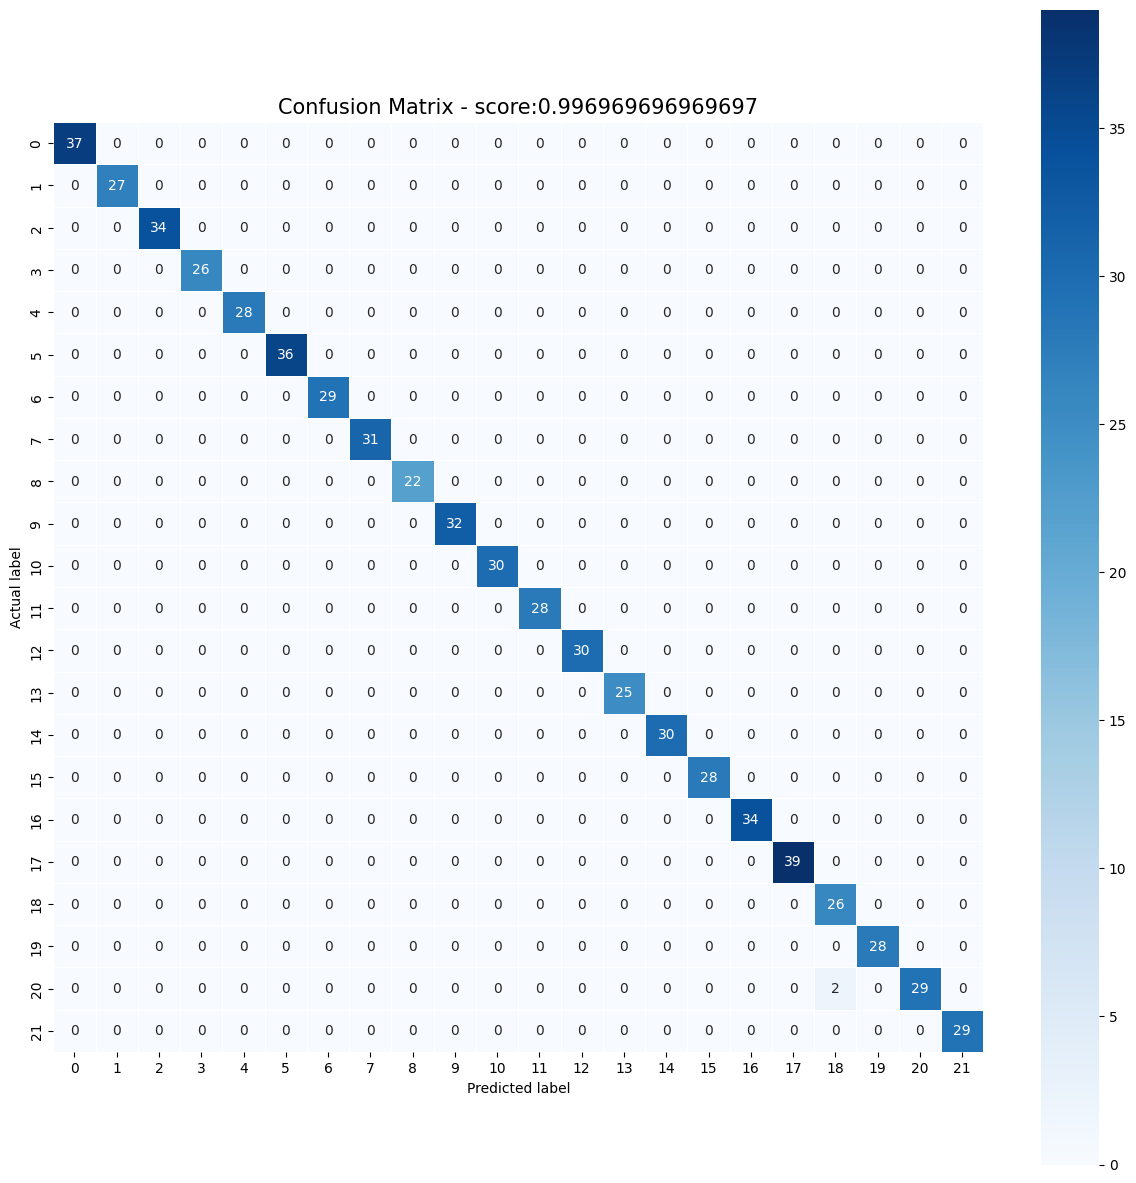

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred2)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(test_y,y_pred2))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print(classification_report(test_y, y_pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        31
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        25
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        28
          17       1.00      1.00      1.00        34
          18       1.00    

## RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier_rf.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred3= classifier_rf.predict(test_x)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred3, test_y)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(test_y, y_pred3)))

Random Forest Model accuracy score: 1.0000


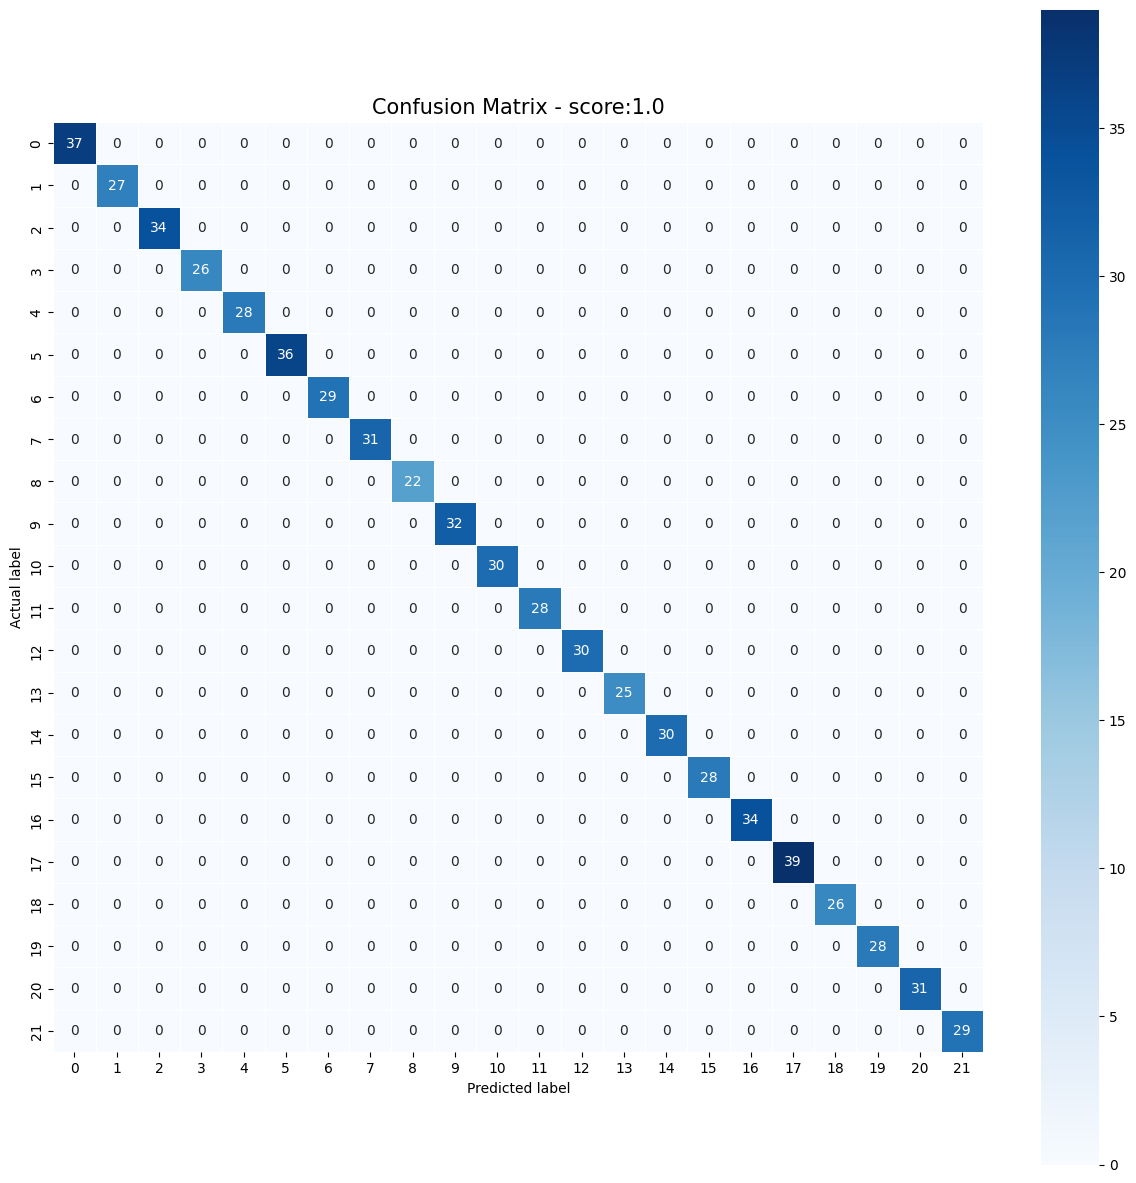

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred3)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(test_y,y_pred3))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
print(classification_report(test_y, y_pred3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        26
           5       1.00      1.00      1.00        28
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00        29
           8       1.00      1.00      1.00        31
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        32
          11       1.00      1.00      1.00        30
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        30
          14       1.00      1.00      1.00        25
          15       1.00      1.00      1.00        30
          16       1.00      1.00      1.00        28
          17       1.00      1.00      1.00        34
          18       1.00    

SUPPORT VECTOR MACHINE



In [ ]:
from sklearn import svm

In [ ]:
x=x.reshape(-1,1)

In [ ]:

crop.dtypes
feature_df=crop[['N','P','K','temperature','humidity','ph','rainfall']]
x=np.asarray(feature_df)
y=np.asarray(crop['crop_num'])
X[0:5]

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25)

In [ ]:
from sklearn import svm

model=svm.SVC(kernel='linear',gamma='auto',C=2)

In [ ]:
model.fit(train_x,train_y)
y_pred=model.predict(test_x)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.76      0.85        29
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        22
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00        22
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        25
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        28
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        21
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        21
          17       1.00      1.00      1.00        20
          18       1.00    

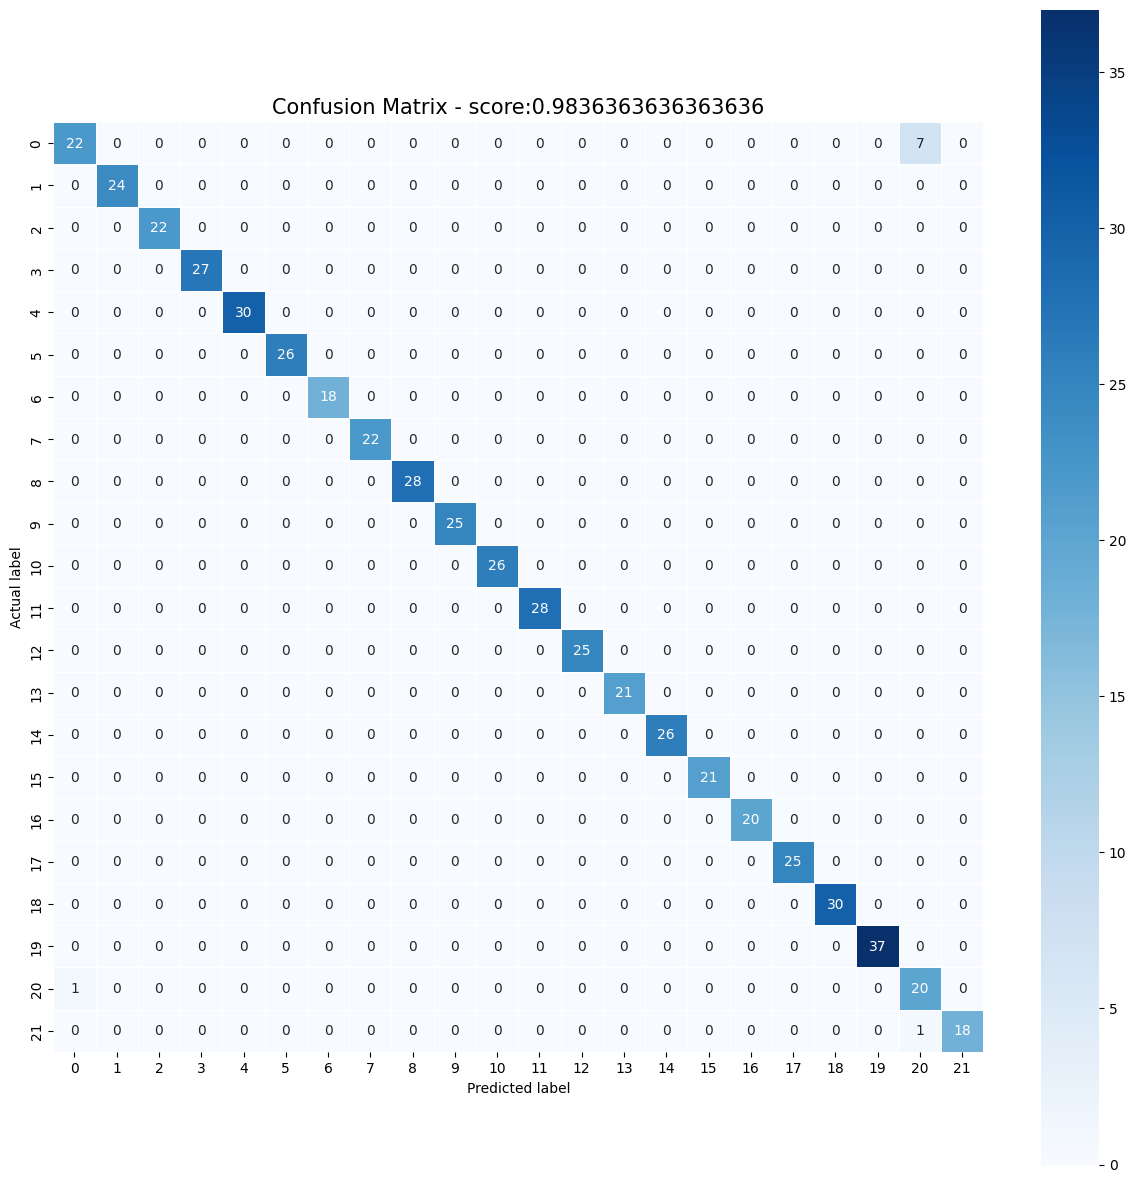

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(test_y,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
acc=accuracy_score(y_pred,test_y)
acc

0.9836363636363636

In [ ]:
f1sv=f1_score(y_pred,test_y,average='micro')
f1sv

0.9836363636363636

KMeans


In [ ]:
crop_x=crop.iloc[:,4:6]
crop_x.head()

,humidity,ph
0,82.002744,6.502985
1,80.319644,7.038096
2,82.320763,7.840207
3,80.158363,6.980401
4,81.604873,7.628473


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

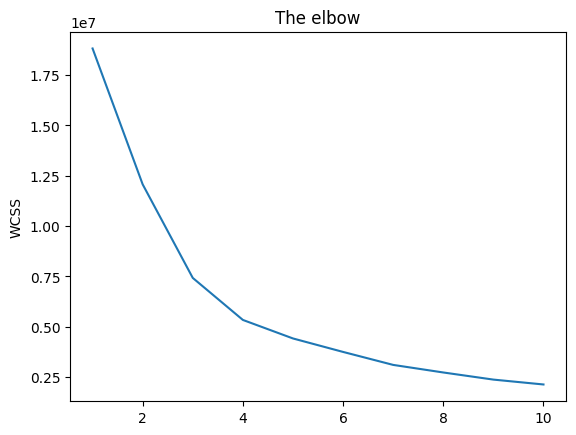

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The elbow")
plt.ylabel('WCSS')
plt.show()

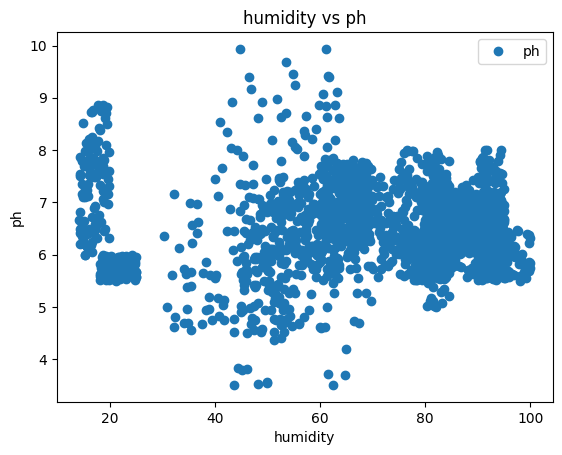

In [ ]:
crop.plot(x='humidity',y='ph',style='o')
plt.title('humidity vs ph')
plt.xlabel('humidity')
plt.ylabel('ph')
plt.show()

In [ ]:
#crop'''kmeans=KMeans(n_clusters=8,random_state=40)
#cropkmeans.fit(x_scaled)'''

In [ ]:
#print(kmeans.cluster_centers_)

In [ ]:
#print(kmeans.labels_)
#crop["kluster"]=kmeans.labels_


In [ ]:
#crop'''output=plt.scatter(x_scaled[:,0],x_scaled[:,1],s=100,c=crop.kluster,marker="x",alpha=1,)
#cropcventers=kmeans.cluster_centers_
#cropplt.scatter(centers[:,0],centers[:,1],c='red',s=100,marker="s");
#cropplt.title("Hasil Klustering K-Means")
#cropplt.colorbar(output)
#cropplt.show()'''

In [ ]:
#actual
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load your crop-related dataset (make sure it contains features like temperature, rainfall, etc.)
# Replace 'your_data.csv' with the path to your dataset.
data = pd.read_csv('/content/Crop_recommendation.csv')

# Select relevant features for clustering
features = data[['humidity', 'rainfall']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Number of clusters (i.e., recommended crops)
num_clusters = 4

# Initialize K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model to your data
kmeans.fit(scaled_data)

# Assign cluster labels to each data point
data['Cluster'] = kmeans.labels_

crops = {
    0: 'Wheat',
    1: 'Rice',
    2: 'Maize',
}

# Function to recommend a crop based on temperature and rainfall
def recommend_crop(humidity, rainfall):
    scaled_input = scaler.transform([[humidity, rainfall]])
    cluster = kmeans.predict(scaled_input)[0]
    recommended_crop = crops[cluster]
    return recommended_crop

# Example usage
humidity = 35
rainfall = 52
recommended_crop = recommend_crop(humidity, rainfall)
print(f"Recommended crop for humidity {humidity}°C and rainfall {rainfall}mm:     {recommended_crop}")
from sklearn.metrics import silhouette_score

# Assuming you have already fitted the K-Means model to your data
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
print(f"\n Silhouette Score: {silhouette_avg}\n")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Recommended crop for humidity 35°C and rainfall 52mm:     Maize

 Silhouette Score: 0.46194816207942785



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
 ac=accuracy_score(y_pred,test_y)
ac

0.9836363636363636

In [ ]:
f1

0.9924242424242424

Performance Component Anlysis


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


features = crop[['temperature', 'rainfall']]  # Add more features as needed

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Initialize and fit the PCA model
n_components = 2  # Set the number of components you want
pca = PCA(n_components=n_components)
pca_result = pca.fit_transform(scaled_data)

# You can access the principal components and their explained variance like this:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

# You can also access the principal component loadings (coefficients) if needed:
component_loadings = pca.components_
print("Principal Component Loadings:", component_loadings)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
# Train a classifier on the reduced data
clf = RandomForestClassifier()
clf.fit(train_x, train_y)

# Make predictions on the test set
predictions = clf.predict(test_x)

# Calculate accuracy
accuracy = accuracy_score(test_y, predictions)
print(f"Accuracy: {accuracy}")

pcaf=PCA(n_components = 2)
pcaf.fit(train_x, train_y)

predictions=clf.predict(test_x)
f1pca=f1_score(test_y,predictions,average='micro')
print(f1pca)

Explained Variance: [0.51504189 0.48495811]
Principal Component Loadings: [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Accuracy: 0.9927272727272727
0.9927272727272727


ANN


In [ ]:
# Check the data shapes and types
print("Shape of train_x:", train_x.shape)
print("Shape of train_y:", train_y.shape)
print("Shape of test_x:", test_x.shape)
print("Shape of test_y:", test_y.shape)

# Check the data types
print("Data type of train_x:", train_x.dtype)
print("Data type of train_y:", train_y.dtype)
print("Data type of test_x:", test_x.dtype)
print("Data type of test_y:", test_y.dtype)

# Ensure class labels are properly encoded
print("Unique class labels in train_y:", np.unique(train_y))
print("Unique class labels in test_y:", np.unique(test_y))


Shape of train_x: (1650, 7)
Shape of train_y: (1650,)
Shape of test_x: (550, 7)
Shape of test_y: (550,)
Data type of train_x: float64
Data type of train_y: int64
Data type of test_x: float64
Data type of test_y: int64
Unique class labels in train_y: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Unique class labels in test_y: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers


# Preprocess the data
'''X = crop.drop('crop_num', axis=1)  # Features
y = crop['crop_num']  # Target variable'''

# Encode the target variable
'''label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)'''

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),  # Hidden layer with ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with ReLU activation
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
predicted_crops = label_encoder.inverse_transform(predicted_labels)

# Example: Given new features 'new_features' for crop recommendation
'''new_features = np.array([[...]])  # Replace with the features for recommendation
new_features = scaler.transform(new_features)
recommendation = model.predict(new_features)
recommended_crop_label = np.argmax(recommendation)
recommended_crop = label_encoder.inverse_transform([recommended_crop_label])

print(f'Recommended Crop: {recommended_crop[0]}')'''


NameError: ignored

In [ ]:
f1ann=f1_score(y_test,predictions.argmax(axis=1),average='micro')
print(f1ann)